In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [3]:
df=pd.read_csv('train_Insurance.csv')
df

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


In [5]:
df.describe(include="all")

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012,5012.000000,5012.000000,5012.000000,5012,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,5012,NaN,NaN,NaN,2,2,2,2,NaN,4,11,1115,2
top,H18228,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,3763,2535,2532,2537,NaN,2310,2476,102,3886
mean,NaN,2013.660215,0.869713,0.301077,NaN,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,NaN,1.383134,0.219496,0.458772,NaN,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


In [6]:
df.rename(columns={'YearOfObservation':'Year_Of_Observation','Building Dimension':'Building_Dimension','NumberOfWindows':'Number_Of_Windows'},inplace=True)
df

,Customer Id,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [7]:
df=df.drop(columns=['Customer Id'])
df

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim
0,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...
5007,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [8]:
df1=df[df.duplicated()]
df1.head()

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim
443,2012,1.0,1,V,N,O,R,999.0,Non-combustible,3,66130,non
584,2013,1.0,0,V,V,V,U,NaN,Non-combustible,without,NaN,non
1601,2012,1.0,0,V,V,V,U,NaN,Non-combustible,without,NaN,non
1663,2014,1.0,0,V,V,V,U,NaN,Non-combustible,without,NaN,non
1685,2014,1.0,0,V,V,V,U,NaN,Fire-resistive,without,NaN,non


In [9]:
df.drop_duplicates(inplace=True,ignore_index=True)
df

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim
0,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...
4965,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
4966,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
4967,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
4968,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [10]:
df.isnull().sum()

Year_Of_Observation     0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building_Dimension     45
Building_Type           0
Number_Of_Windows       0
Geo_Code               41
Claim                   0
dtype: int64

In [11]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
arr=mf_imputer.fit_transform(df.loc[:,['Garden']])
df[['Garden']]=arr
df.isnull().sum()

Year_Of_Observation     0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building_Dimension     45
Building_Type           0
Number_Of_Windows       0
Geo_Code               41
Claim                   0
dtype: int64

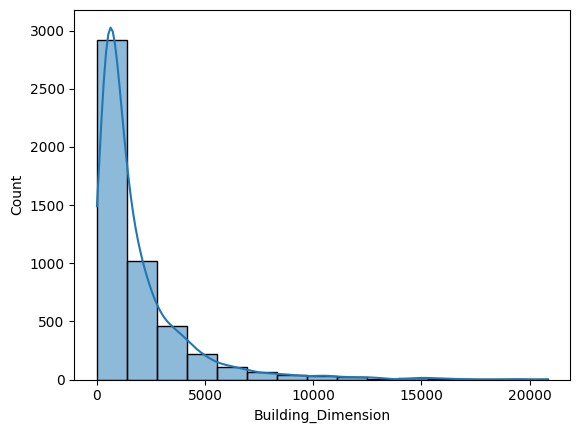

In [12]:
sns.histplot(x='Building_Dimension',data=df,bins=15,kde=True)
plt.show()

In [13]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
arr=mf_imputer.fit_transform(df.loc[:,['Geo_Code']])
df[['Geo_Code']]=arr
df.isnull().sum()

Year_Of_Observation     0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building_Dimension     45
Building_Type           0
Number_Of_Windows       0
Geo_Code                0
Claim                   0
dtype: int64

In [14]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='median')
arr=mf_imputer.fit_transform(df.loc[:,['Building_Dimension']])
df[['Building_Dimension']]=arr
df.isnull().sum()

Year_Of_Observation    0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building_Dimension     0
Building_Type          0
Number_Of_Windows      0
Geo_Code               0
Claim                  0
dtype: int64

In [15]:
ord_categories=[["N","V"],["N","V"],["O","V"],['U','R'],['Fire-resistive', 'Non-combustible', 'Ordinary', 'Wood-framed']]
enc1 = OrdinalEncoder(categories=ord_categories)
df[["Building_Painted","Building_Fenced","Garden",'Settlement','Building_Type']]=enc1.fit_transform(df.loc[:,["Building_Painted", "Building_Fenced","Garden",'Settlement','Building_Type']])
df

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim
0,2012,1.0,1,0.0,1.0,1.0,0.0,1240.0,3.0,without,75117,non
1,2012,1.0,0,0.0,1.0,1.0,0.0,900.0,1.0,without,62916,non
2,2013,1.0,1,1.0,0.0,0.0,1.0,4984.0,1.0,4,31149,oui
3,2016,0.5,0,0.0,1.0,1.0,0.0,600.0,3.0,without,6012,oui
4,2012,1.0,0,0.0,1.0,1.0,0.0,900.0,1.0,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...
4965,2013,1.0,0,0.0,1.0,1.0,0.0,550.0,2.0,without,33063,oui
4966,2012,0.5,0,1.0,0.0,0.0,1.0,1000.0,0.0,4,13004,non
4967,2015,1.0,1,1.0,0.0,0.0,1.0,480.0,2.0,3,94059,non
4968,2012,0.5,0,1.0,0.0,0.0,1.0,536.0,0.0,4,74243,non


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Of_Observation  4970 non-null   int64  
 1   Insured_Period       4970 non-null   float64
 2   Residential          4970 non-null   int64  
 3   Building_Painted     4970 non-null   float64
 4   Building_Fenced      4970 non-null   float64
 5   Garden               4970 non-null   float64
 6   Settlement           4970 non-null   float64
 7   Building_Dimension   4970 non-null   float64
 8   Building_Type        4970 non-null   float64
 9   Number_Of_Windows    4970 non-null   object 
 10  Geo_Code             4970 non-null   object 
 11  Claim                4970 non-null   object 
dtypes: float64(7), int64(2), object(3)
memory usage: 466.1+ KB


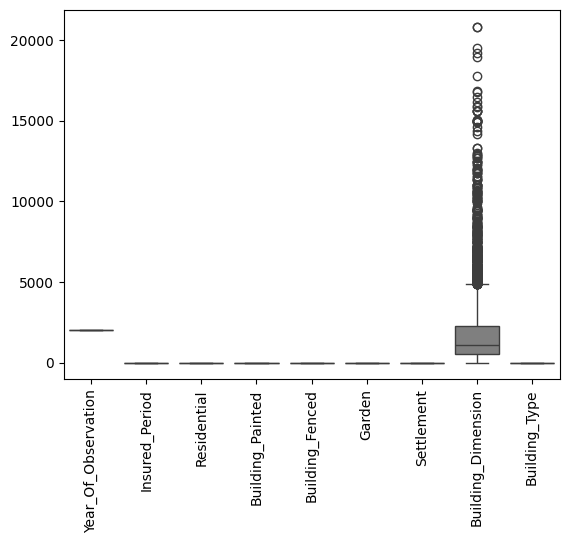

In [17]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

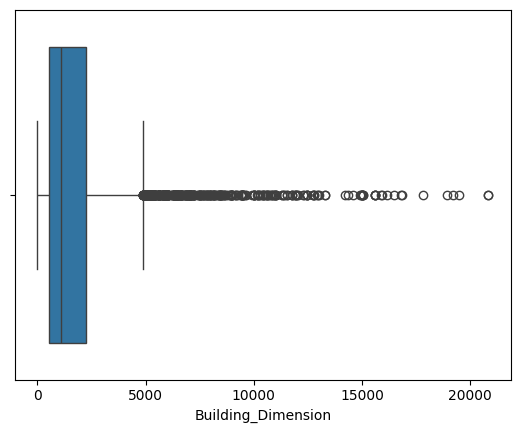

In [18]:
sns.boxplot(data=df,x='Building_Dimension')
plt.show()

In [19]:
Q1,Q3=np.percentile(df["Building_Dimension"],[25,75])
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
df['Building_Dimension']=np.where(df['Building_Dimension']>=upper_limit,
upper_limit, np.where(df['Building_Dimension']<=lower_limit,
lower_limit,df['Building_Dimension']))

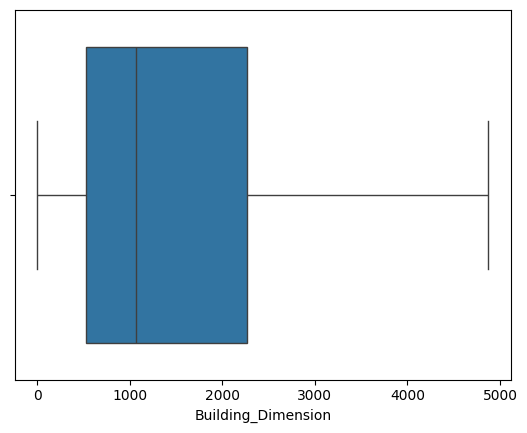

In [20]:
sns.boxplot(data=df,x='Building_Dimension')
plt.show()

In [21]:
df["Number_Of_Windows"]=df["Number_Of_Windows"].replace({'without':'0','>=10':'10'})
df["Number_Of_Windows"].value_counts()

Number_Of_Windows
0     2440
4      665
3      598
5      436
2      245
6      225
7      141
8       84
10      52
1       49
9       35
Name: count, dtype: int64

In [22]:
df['Number_Of_Windows']=df['Number_Of_Windows'].astype('int')
df['Number_Of_Windows'].value_counts()

Number_Of_Windows
0     2440
4      665
3      598
5      436
2      245
6      225
7      141
8       84
10      52
1       49
9       35
Name: count, dtype: int64

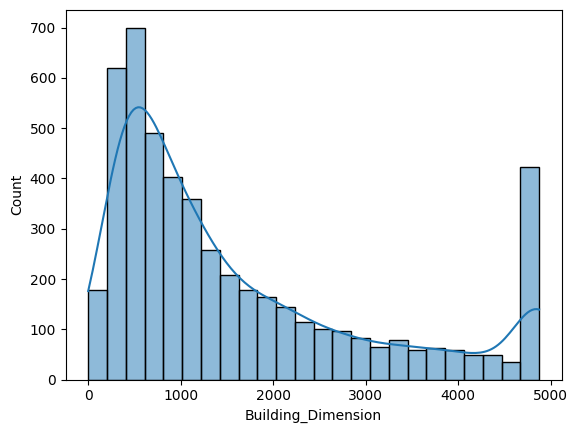

In [23]:
sns.histplot(data=df,x='Building_Dimension',kde=True)
plt.show()

In [24]:
df['Building_Dimension'] = df['Building_Dimension'].round(0).astype(int)
bins = [0, 50, 200, 500, 1000, np.inf]  # Adjust the ranges as needed
labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']

df['Building_Dimension'] = pd.cut(df['Building_Dimension'], bins=bins, labels=labels)
df['Building_Dimension']


0       Very Large
1            Large
2       Very Large
3            Large
4            Large
           ...    
4965         Large
4966         Large
4967        Medium
4968         Large
4969    Very Large
Name: Building_Dimension, Length: 4970, dtype: category
Categories (5, object): ['Very Small' < 'Small' < 'Medium' < 'Large' < 'Very Large']

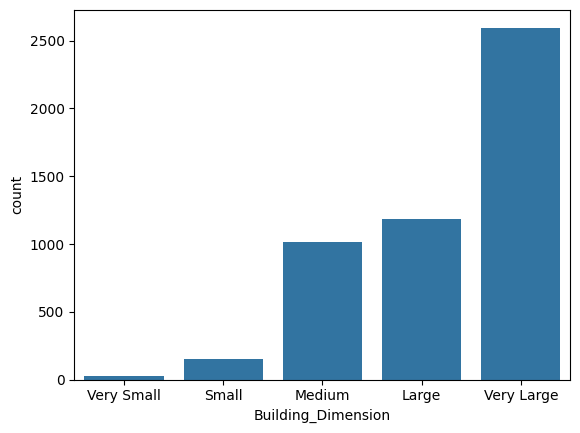

In [25]:
sns.countplot(data=df,x='Building_Dimension')
plt.show()

In [26]:
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='quantile', subsample=len(df))

df['Building_Dimension'] = enc.fit_transform(df[['Building_Dimension']])
df['Building_Dimension']

TypeError: unsupported operand type(s) for -: 'str' and 'str'

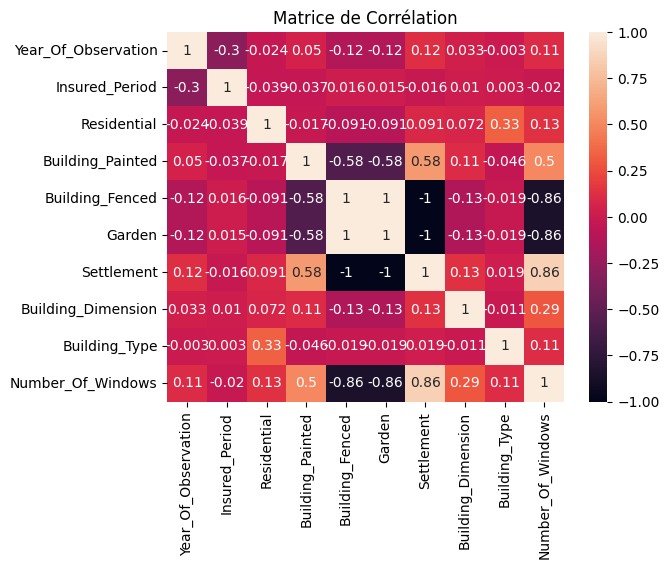

In [ ]:
df_corr=df.corr(numeric_only= True)
sns.heatmap(df_corr, annot=True,vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

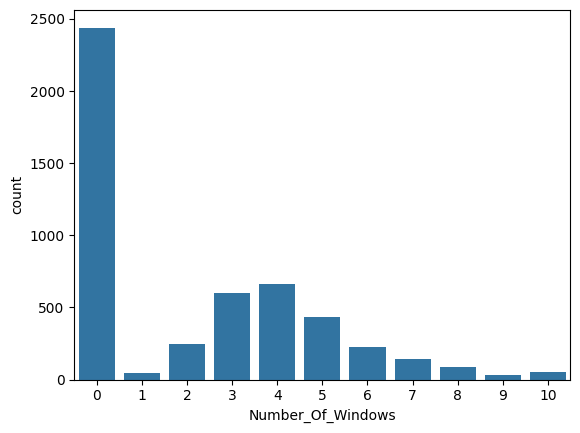

In [ ]:
sns.countplot(data=df,x='Number_Of_Windows')
plt.show()

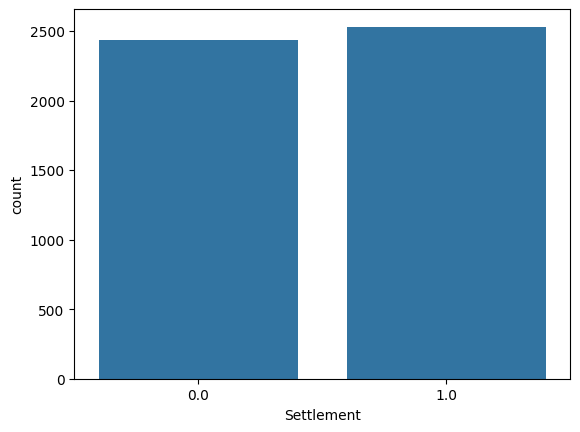

In [ ]:
sns.countplot(data=df,x='Settlement')
plt.show()

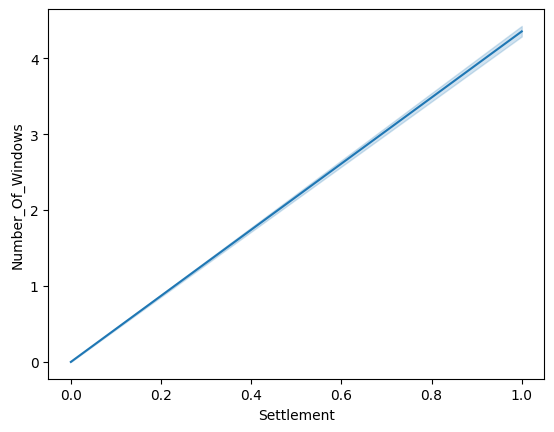

In [ ]:
sns.lineplot(x='Settlement',y='Number_Of_Windows',data=df,)
plt.show()

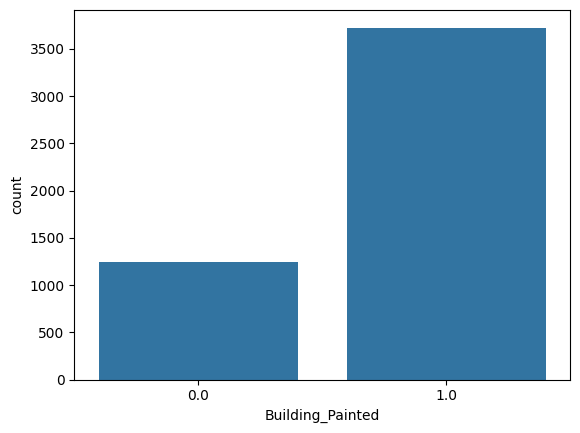

In [ ]:
sns.countplot(data=df,x='Building_Painted')
plt.show()

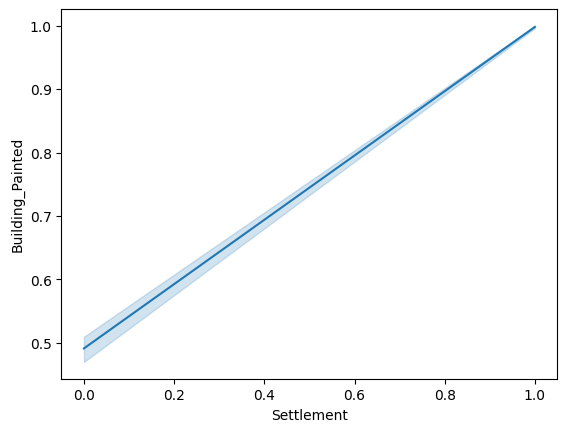

In [ ]:
sns.lineplot(x='Settlement',y='Building_Painted',data=df,)
plt.show()

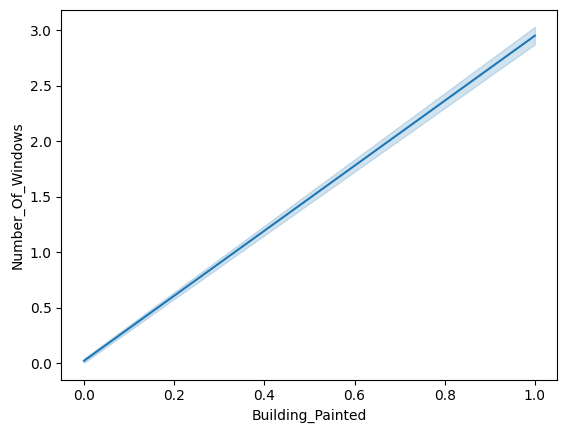

In [ ]:
sns.lineplot(y='Number_Of_Windows',x='Building_Painted',data=df,)
plt.show()

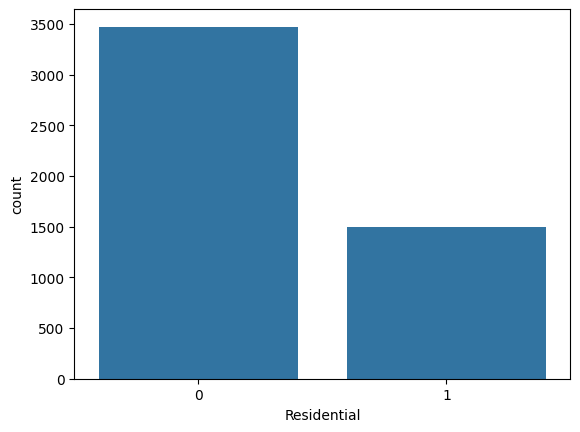

In [ ]:
sns.countplot(data=df,x='Residential')
plt.show()

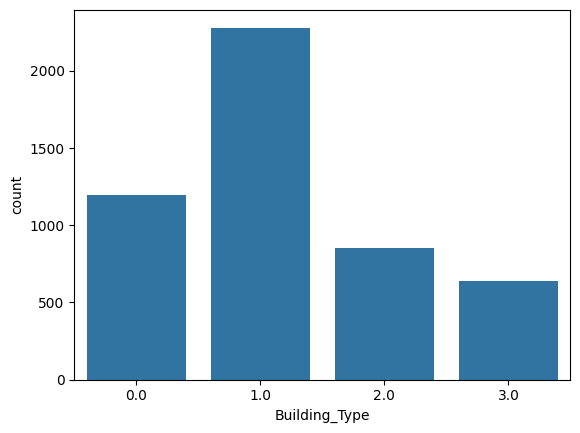

In [ ]:
sns.countplot(data=df,x='Building_Type')
plt.show()

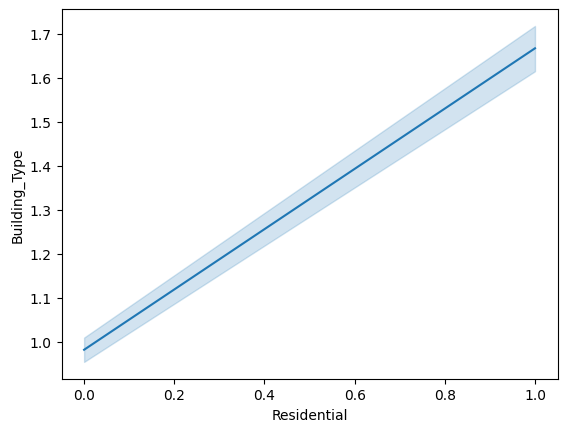

In [ ]:
sns.lineplot(x='Residential',y='Building_Type',data=df,)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['Year_Of_Observation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building_Dimension', 'Building_Type', 'Number_Of_Windows', 'Geo_Code',
       'Claim', 'Building_Size_Category'],
      dtype='object')

In [ ]:
X = df[['Year_Of_Observation', 'Insured_Period', 'Residential',
           'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
           'Building_Type', 'Number_Of_Windows', 
           ]]
Y = df['Claim']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f'Train set: {x_train.shape}, Test set: {x_test.shape}')

Train set: (3976, 9), Test set: (994, 9)


In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

c:\Users\hp\Desktop\Ml_Project\Assurance-Habitation-Pr-diction-Accidents\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score=accuracy_score

In [ ]:
score=accuracy_score(prediction,y_test)
score

0.7867203219315896

In [ ]:
from sklearn.svm import SVC 

In [ ]:
model2 = SVC(kernel='linear')

In [ ]:
model2.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
predictions=model2.predict(x_test)

In [ ]:
score2=accuracy_score(predictions,y_test)

In [ ]:
score2

0.7847082494969819